In [1]:
import re
import os 

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
sns.set_style("whitegrid", {"grid.linestyle":"--"})

import pandas as pd 
from pprint import pprint

!pwd

/home/bibek/Desktop/flow/michael_files


In [17]:
# manually compiled results: 
humans_gpt_avg_speeds = np.array([4.51, 3.32, 0.0, 3.33, 3.54, 3.33, 0.01, 0.15, 3.30, 3.32, 0.58, 3.33, 3.34, 3.34, 0.0, 3.28, 3.3, 0.0, 3.34, 4.19, 3.32, 0.01, 3.31, 0.01, 4.49]) 
humans_gpt_min_speeds = np.array([1.72, 0.0, 0.0, 0.0, 1.84, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 , 0.0, 0.0, 0.0, 0.0, 1.35, 0.0, 0.0, 0.0, 0.0, 2.45])

In [18]:
# manually compiled results: 
humans_avg_speeds = np.array([0.05, 3.33, 4.48, 3.33, 4.4, 0.0, 0.0, 3.33, 3.33, 3.33, 3.27, 2.1, 3.32, 3.52, 3.30, 3.29, 4.15, 4.55, 0.66, 3.33, 0.0, 4.12, 3.35])
humans_min_speeds = np.array([0.0, 0.0, 1.94, 0.0, 1.37, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35, 0.0, 0.0, 0.0, 0.0, 2.36, 2.81, 0.0, 0.0, 0.0, 1.44, 0.0])


25
25
23
23


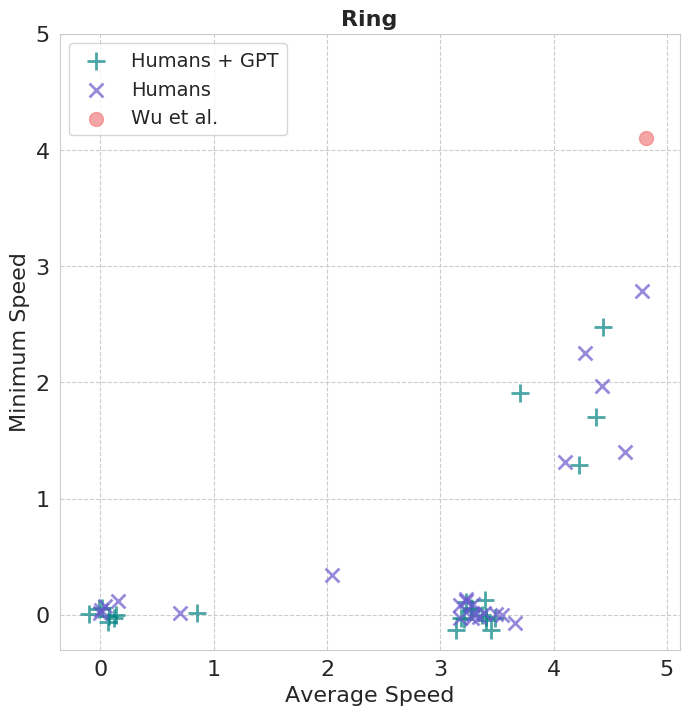

In [60]:
import re
import os 

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
sns.set_style("whitegrid", {"grid.linestyle":"--"})

import pandas as pd 
from pprint import pprint

# manually compiled results: 
print(len(humans_gpt_avg_speeds))
print(len(humans_gpt_min_speeds))
print(len(humans_avg_speeds))
print(len(humans_min_speeds))

# Add a small jitter to data points to separate them
def jitter(arr):
    stdev = .03*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

jittered_avg_speeds_gpt = jitter(humans_gpt_avg_speeds)
jittered_min_speeds_gpt = jitter(humans_gpt_min_speeds)

jittered_avg_speeds = jitter(humans_avg_speeds)
jittered_min_speeds = jitter(humans_min_speeds)

fs = 16
fig, ax = plt.subplots(figsize=(8,8), dpi = 100)

ax.scatter(jittered_avg_speeds_gpt, jittered_min_speeds_gpt, alpha=0.7, label='Humans + GPT', color='teal', marker = '+', s=150, linewidth=2)
ax.scatter(jittered_avg_speeds, jittered_min_speeds, alpha=0.7, label='Humans', color='slateblue', marker='x', s=100, linewidth=2)

# Wu et al average 4.82, min 4.1 
ax.scatter(4.82, 4.1, color='lightcoral', alpha = 0.7, marker='o', s=100, label = "Wu et al.")

ax.set_xlabel('Average Speed', fontsize=fs)
ax.set_ylabel('Minimum Speed', fontsize=fs)
ax.set_title('Ring', fontsize=fs, weight='bold')
ax.legend(fontsize=fs-2, loc='upper left')

ax.set_ylim([-0.3, 5])
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_yticks([0, 1, 2, 3, 4, 5])

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.show()

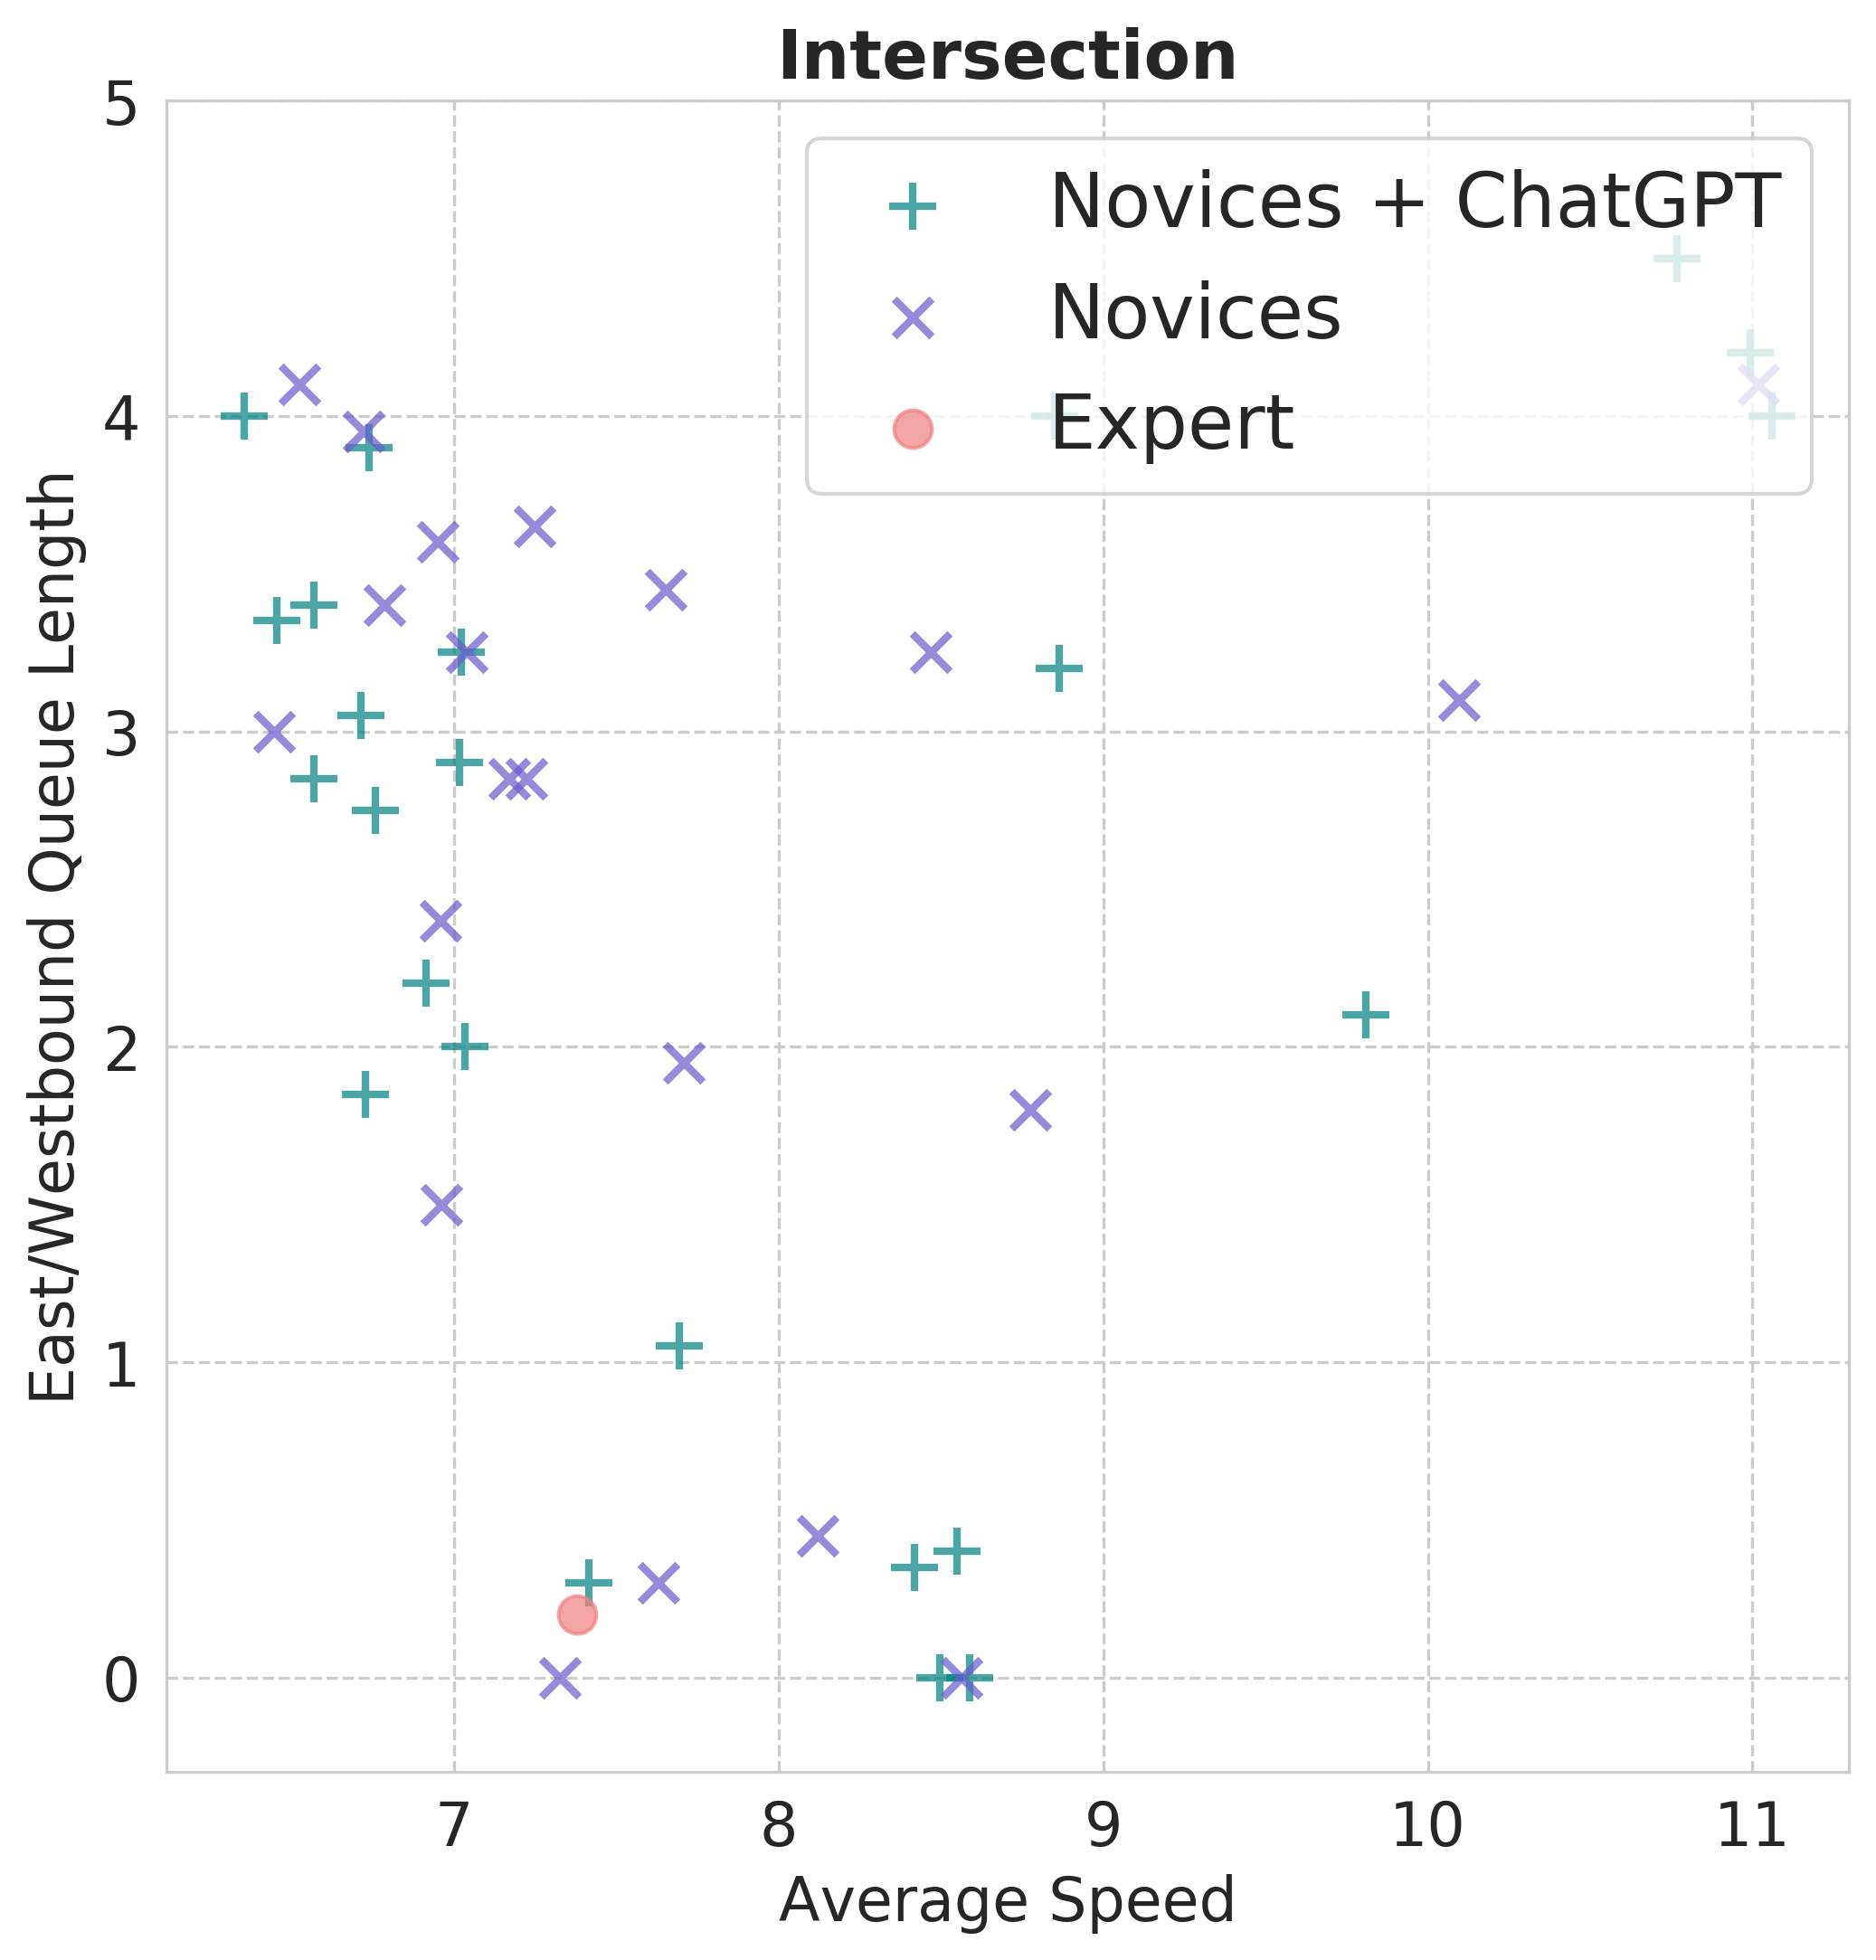

In [2]:
import re
import os 
import csv

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
sns.set_style("whitegrid", {"grid.linestyle":"--"})

import pandas as pd 
from pprint import pprint

# manually compiled results: 
# print(len(humans_gpt_avg_speeds))
# print(len(humans_gpt_min_speeds))
# print(len(humans_avg_speeds))
# print(len(humans_min_speeds))

csv_file_path = 'int_results_human.csv'

# Read the CSV file and extract columns into lists
x1_array = []
y1_array = []

with open(csv_file_path, 'r', newline='') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        x1_array.append(float(row[0]))  # Assuming the values are of float type
        y1_array.append(float(row[1]))  # Assuming the values are of float type

# Convert the lists to NumPy arrays
humans_avg_speeds = np.array(x1_array) # Human
humans_ql = np.array(y1_array)

csv_file_path = 'int_results_gpt.csv'

# Read the CSV file and extract columns into lists
x2_array = []
y2_array = []

with open(csv_file_path, 'r', newline='') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        x2_array.append(float(row[0]))  # Assuming the values are of float type
        y2_array.append(float(row[1]))  # Assuming the values are of float type

# Convert the lists to NumPy arrays
humans_gpt_avg_speeds = np.array(x2_array) # Human + GPT
humans_gpt_ql = np.array(y2_array)

# Add a small jitter to data points to separate them
def jitter(arr):
    return arr
#     stdev = .03*(max(arr)-min(arr))
#     return arr + np.random.randn(len(arr)) * stdev

jittered_avg_speeds_gpt = jitter(humans_gpt_avg_speeds)
jittered_min_speeds_gpt = jitter(humans_gpt_ql)

jittered_avg_speeds = jitter(humans_avg_speeds)
jittered_min_speeds = jitter(humans_ql)

fs = 16
fig, ax = plt.subplots(figsize=(8,8), dpi = 300)

ax.scatter(jittered_avg_speeds_gpt, jittered_min_speeds_gpt, alpha=0.7, label='Novices + ChatGPT', color='teal', marker = '+', s=150, linewidth=2)
ax.scatter(jittered_avg_speeds, jittered_min_speeds, alpha=0.7, label='Novices', color='slateblue', marker='x', s=100, linewidth=2)

# Wu et al average 4.82, min 4.1 
ax.scatter(7.38, 0.2, color='lightcoral', alpha = 0.7, marker='o', s=100, label = "Expert")

ax.set_xlabel('Average Speed', fontsize=fs)
ax.set_ylabel('East/Westbound Queue Length', fontsize=fs)
ax.set_title('Intersection', fontsize=fs+2, weight='bold')
ax.legend(fontsize=fs+4, loc='upper right')

ax.set_ylim([-0.3, 5])
# ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_yticks([0, 1, 2, 3, 4, 5])

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

# plt.show()
plt.savefig('./int_results.png')

(24,)
(24,)
(27,)
(27,)


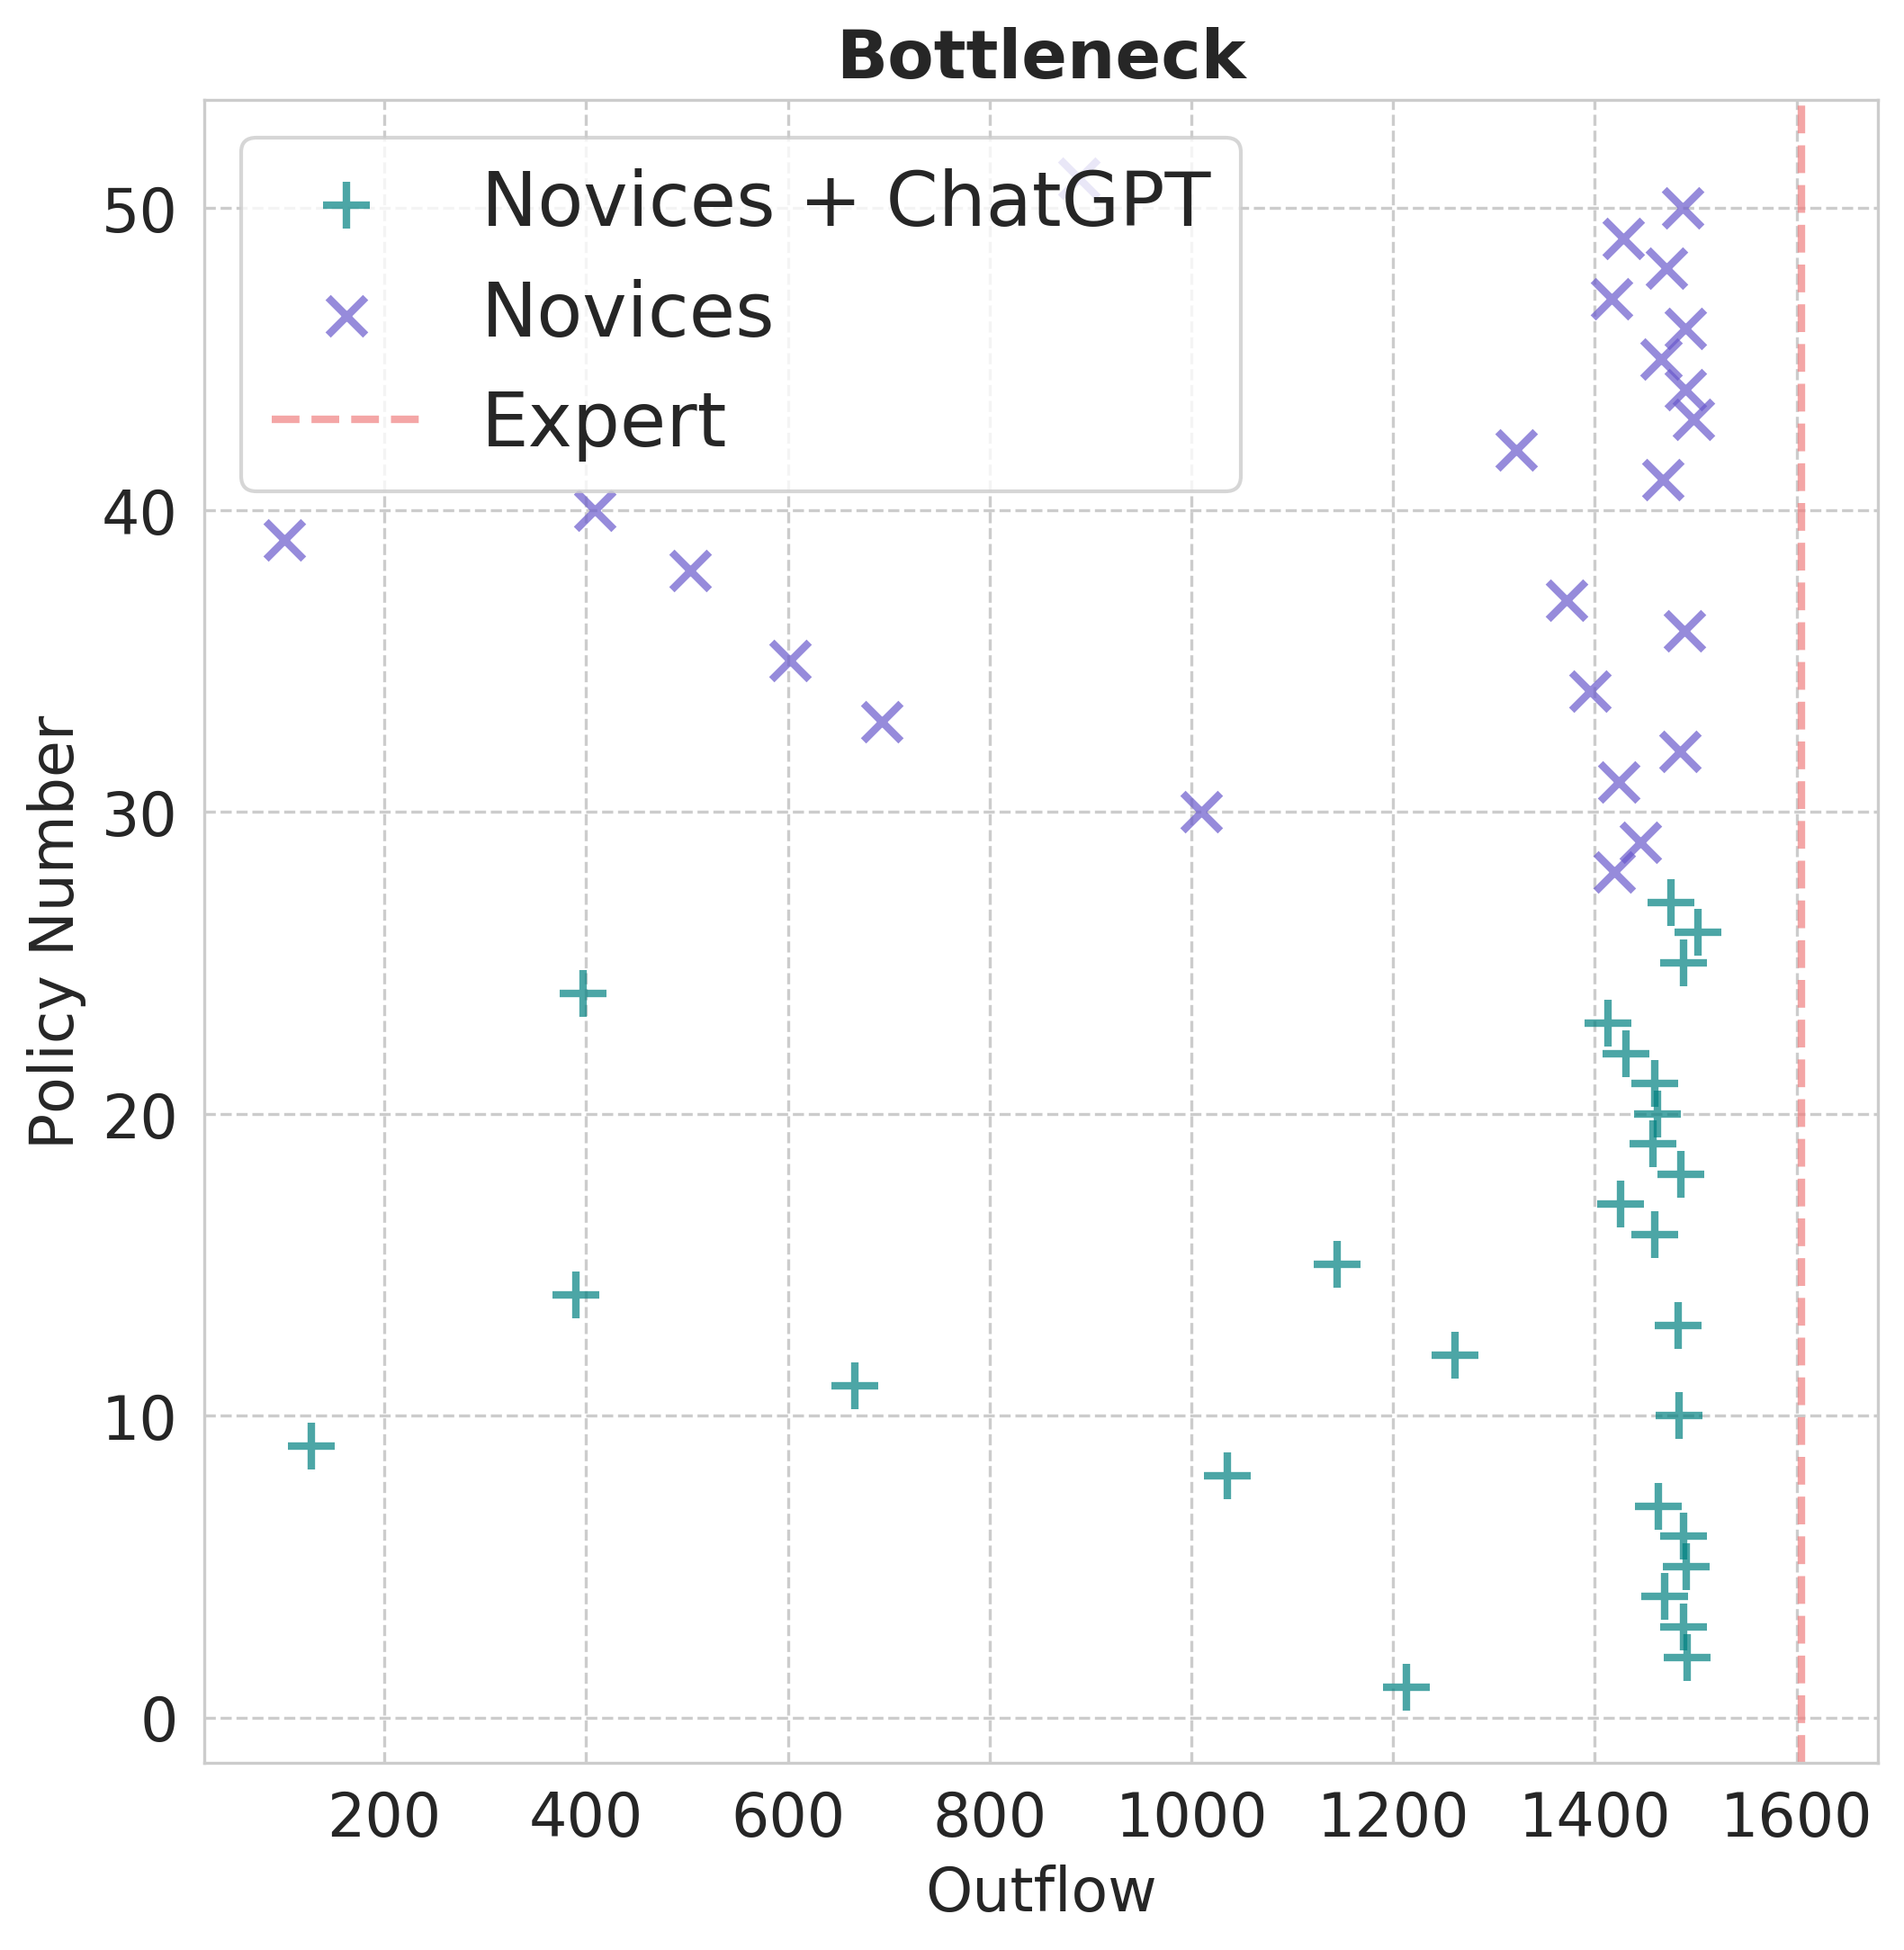

In [11]:
import re
import os 
import csv

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
sns.set_style("whitegrid", {"grid.linestyle":"--"})

import pandas as pd 
from pprint import pprint

# manually compiled results: 
# print(len(humans_gpt_avg_speeds))
# print(len(humans_gpt_min_speeds))
# print(len(humans_avg_speeds))
# print(len(humans_min_speeds))

csv_file_path = 'bn_results_human.csv'

# Read the CSV file and extract columns into lists
x1_array = []

with open(csv_file_path, 'r', newline='') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        x1_array.append(float(row[0]))  # Assuming the values are of float type

# Convert the lists to NumPy arrays
humans_thru = np.array(x1_array) # Human
print(humans_thru.shape)
humans_thru_y = np.array([28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51])
print(humans_thru_y.shape)

csv_file_path = 'bn_results_gpt.csv'

# Read the CSV file and extract columns into lists
x2_array = []

with open(csv_file_path, 'r', newline='') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        x2_array.append(float(row[0]))  # Assuming the values are of float type

# Convert the lists to NumPy arrays
gpt_thru = np.array(x2_array) # Human + GPT
print(gpt_thru.shape)
gpt_thru_y = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27])
print(gpt_thru.shape)

fs = 16
fig, ax = plt.subplots(figsize=(8,8), dpi = 300)

second = ax.scatter(gpt_thru, gpt_thru_y, alpha=0.7, label='Novices + ChatGPT', color='teal', marker = '+', s=150, linewidth=2)
third = ax.scatter(humans_thru, humans_thru_y, alpha=0.7, label='Novices', color='slateblue', marker='x', s=100, linewidth=2)

# Wu et al average 4.82, min 4.1 
# ax.scatter(1604.88, color='lightcoral', alpha = 0.7, marker='o', s=100, label = "Expert")
first = ax.axvline(1604.88, color='lightcoral', alpha = 0.7, linewidth=2, label = "Expert", linestyle="dashed")
# ax.axvline(1400, color='black', alpha = 0.7, linewidth=2,)

ax.set_xlabel('Outflow', fontsize=fs)
ax.set_ylabel('Policy Number', fontsize=fs)
ax.set_title('Bottleneck', fontsize=fs+2, weight='bold')
ax.legend(handles=[second, third, first], fontsize=fs+4, loc='upper left')

# ax.set_ylim([-0.3, 5])
# ax.set_xticks([0, 1, 2, 3, 4, 5])
# ax.set_yticks([0, 1, 2, 3, 4, 5])

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

# plt.show()
plt.savefig('./bn_results.png')

[1419.12       1445.04       1010.16       1423.44       1484.64
  693.36       1395.36        602.64       1488.96       1371.6
  503.28        100.8         408.96       1467.36       1321.92
 1497.6        1489.68       1465.92       1489.68       1416.24
 1470.96       1427.76       1486.8         888.22743455]
[1213.2  1491.84 1488.24 1469.52 1490.4  1487.52 1463.04 1036.08  127.44
 1483.2   666.   1261.44 1482.48  389.52 1144.08 1459.44 1425.6  1485.36
 1458.   1461.6  1459.44 1430.64 1413.36  397.44 1487.52 1501.92 1475.28]


/home/michael/anaconda3/envs/flow/lib/python3.7/site-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


ValueError: Could not interpret value `throughput` for parameter `x`

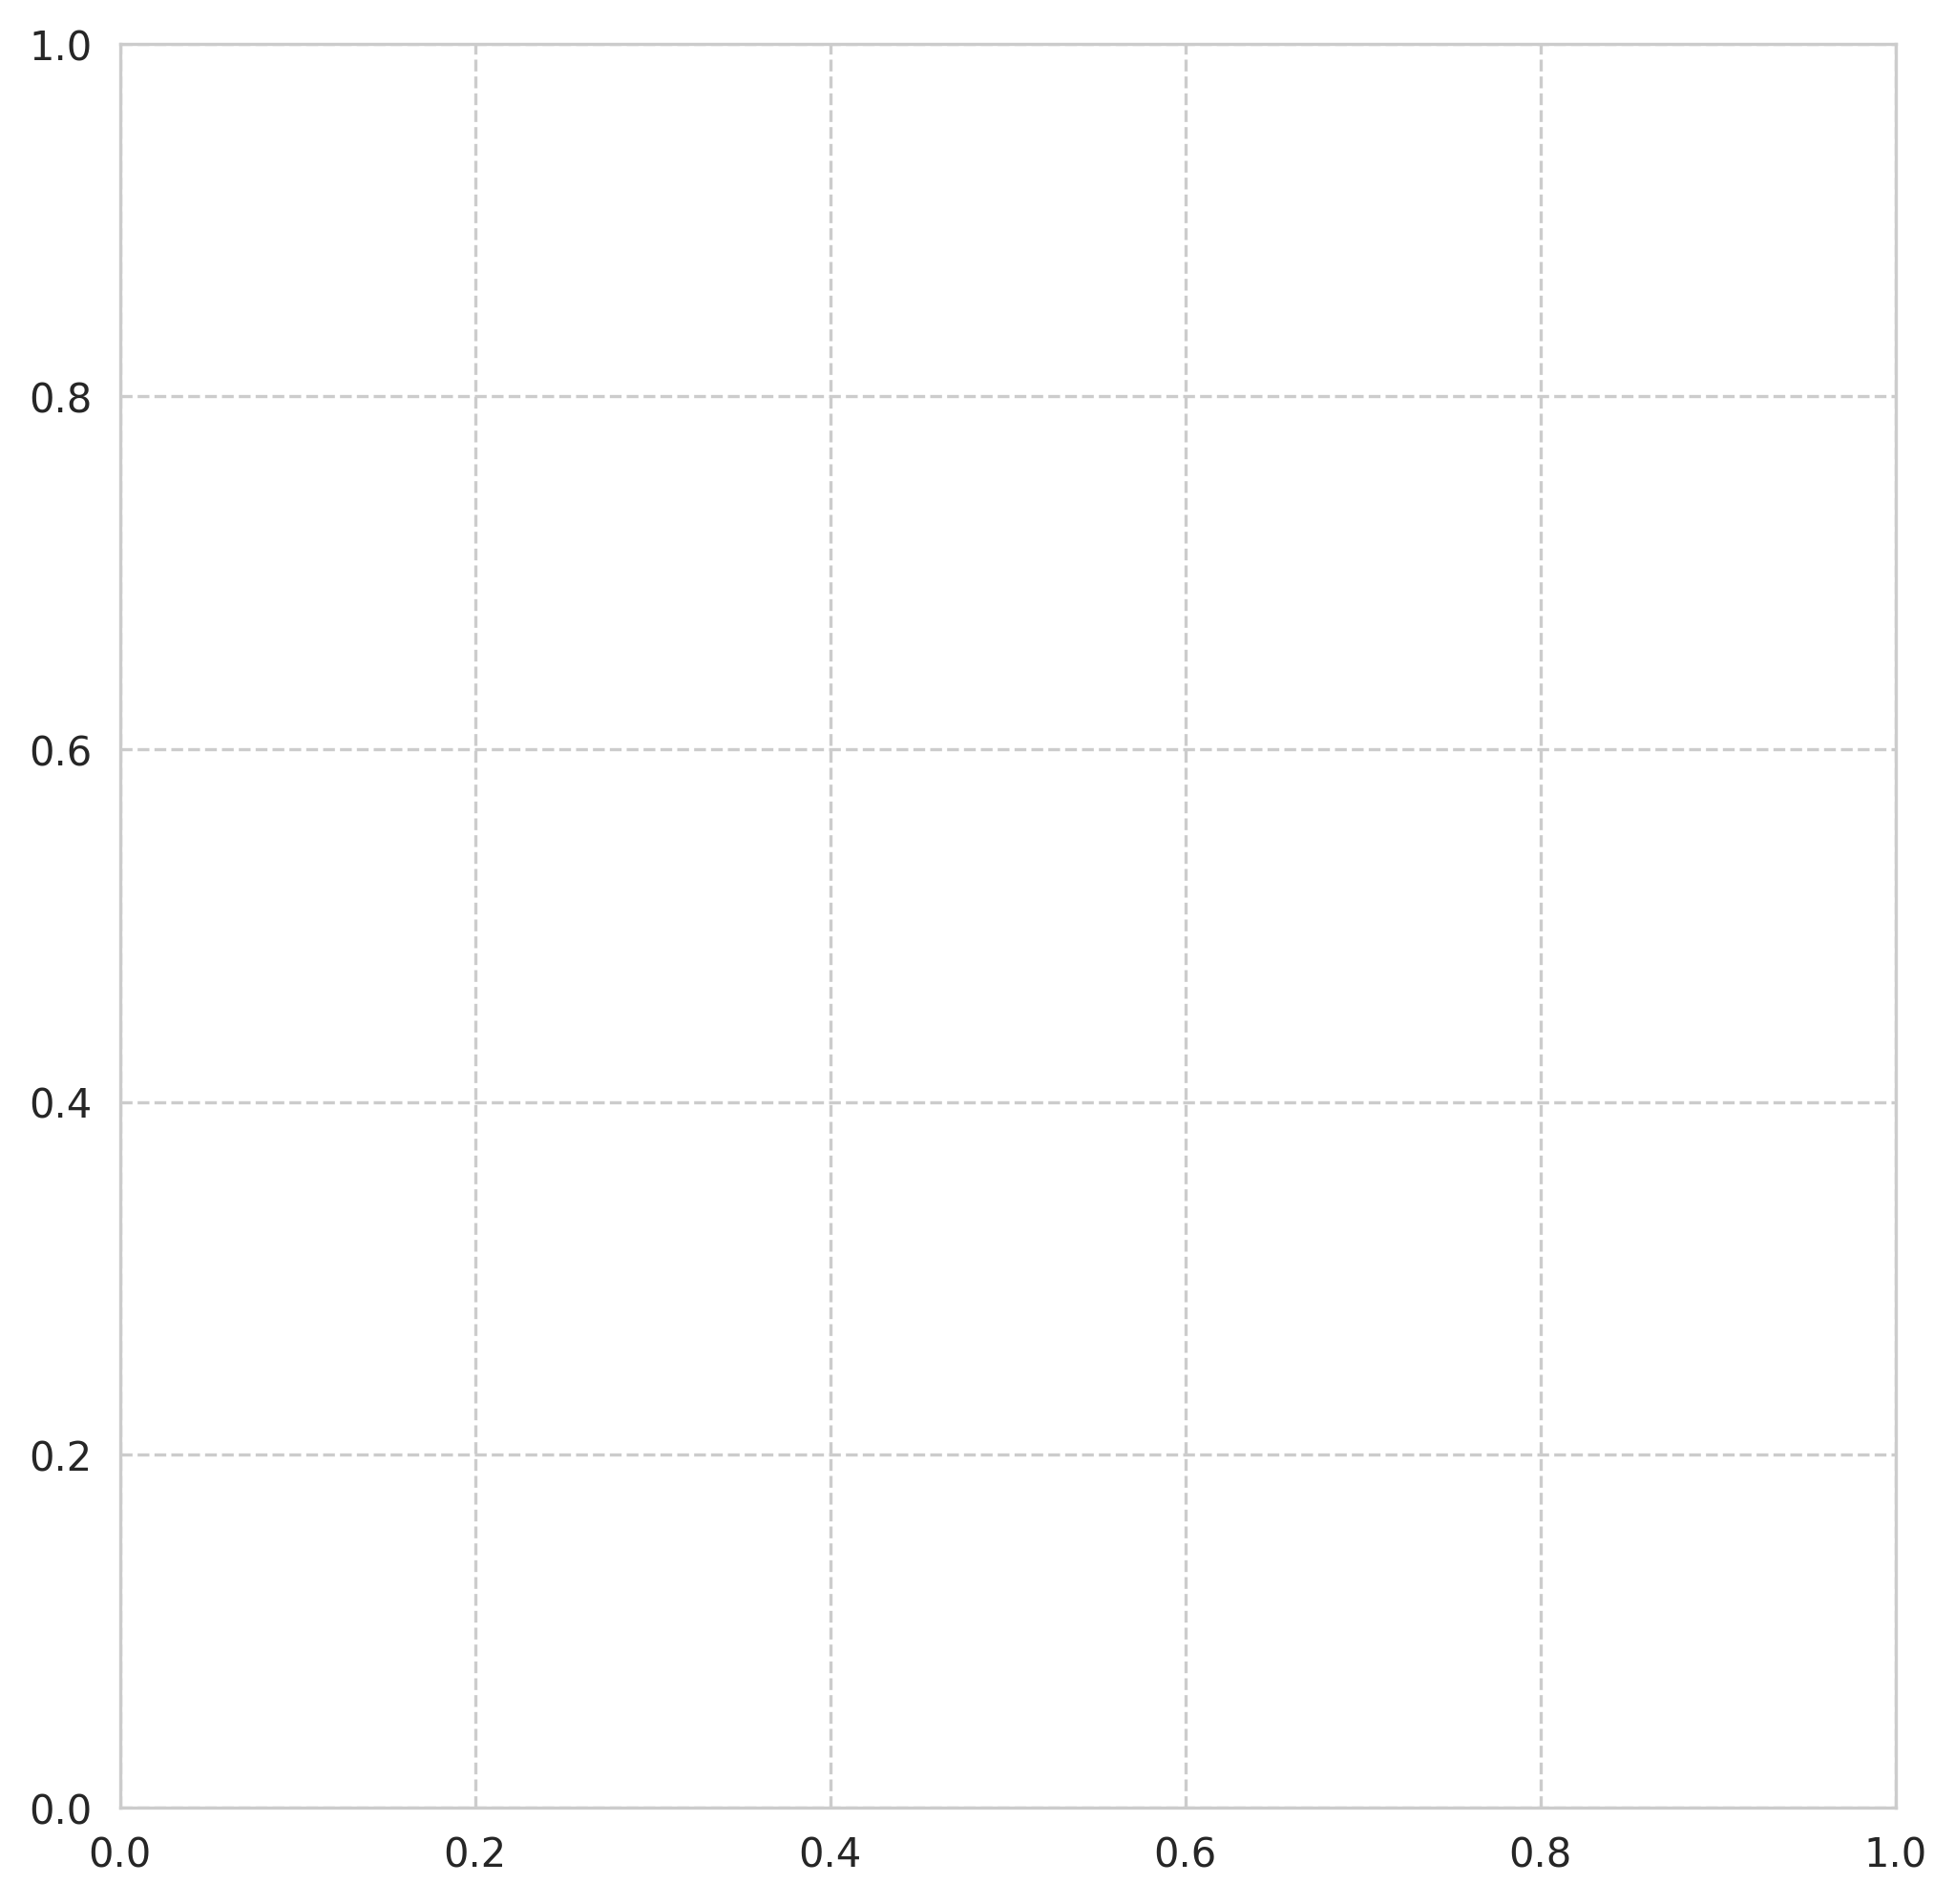

In [71]:
import re
import os 
import csv

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
sns.set_style("whitegrid", {"grid.linestyle":"--"})

import pandas as pd 
from pprint import pprint

from scipy.stats import norm
from sklearn.neighbors import KernelDensity

csv_file_path = 'rollout_results_human.csv'
x1_array = []

with open(csv_file_path, 'r', newline='') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        x1_array.append(float(row[0]))  # Assuming the values are of float type

humans_thru = np.array(x1_array) # Human
print(humans_thru)

csv_file_path = 'rollout_results_gpt.csv'
x2_array = []

with open(csv_file_path, 'r', newline='') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        x2_array.append(float(row[0]))  # Assuming the values are of float type
        
gpt_thru = np.array(x2_array) # Human + GPT
print(gpt_thru)

fs = 16
fig, ax = plt.subplots(figsize=(8,8), dpi = 300)

# sns.kdeplot(humans_thru, color="slateblue", label="Humans", fill=True, clip=(0, 1490))
# sns.kdeplot(gpt_thru, color="teal", label="Humans + GPT-4", fill=True, clip=(0, 1502))

# ax.hist(humans_thru, color="slateblue", label="Humans", alpha=0.5, bins=50)
# ax.hist(gpt_thru, color="teal", label="Humans + GPT-4", alpha=0.5, bins=50)

sns.stripplot(gpt_thru, x="throughput", color="teal", label="Humans + GPT-4")

ax.scatter(1604.88, 0, color='lightcoral', alpha = 0.7, marker='o', s=150, label = "Expert")

# ax.hist(human_thru, bins=10, density=True, color="slateblue", label="Humans", histtype="step")
# ax.hist(gpt_thru, bins=10, density=True, color="teal", label="Humans + GPT-4", histtype="step")

ax.legend(fontsize=fs+4, loc='upper left')


# kde = KernelDensity(kernel="gaussian", bandwidth=0.5).fit(gpt_thru)
# gpt_dens = kde.score_samples(X_plot)
# # print(gpt_dens)
# # print(np.exp(gpt_dens))
# ax.plot(X_plot[:, 0], np.exp(gpt_dens), alpha=0.7, label='Humans + GPT-4', color='teal', linestyle="-", linewidth=2)



# kde = KernelDensity(kernel="gaussian", bandwidth=0.5).fit(humans_thru)
# humans_dens = kde.score_samples(X_plot)
# ax.plot(X_plot[:, 0], np.exp(humans_dens), alpha=0.7, label='Humans', color='slateblue', linestyle="-", linewidth=2)


In [44]:
# Humans + GPT: 28
# Humans: 25